# Example solar power forecast

Here's a quick example of a solar power forecast.

## Environment setup:
Using miniforge:
```
conda create --name energy_forecasting_env python=3.12 -y
conda activate energy_forecasting_env
conda install -c conda-forge herbie-data -y
pip install pvlib ipykernel

```

In [3]:
# import functions
from pv_model import model_pv_power
from forecast_solar import get_solar_forecast

In [4]:
# specs for a generic 100 MW solar plant, single-axis tracking, thin-film (truetracking)
latitude = 33.5
longitude = -86.8
mount_type = 'single-axis'
gcr = 0.4
nameplate_dc = 120
nameplate_ac = 100
dc_loss_fraction = 0.1
gamma_pdc = -0.003
shade_loss_model = 'linear'
backtrack = False
max_tracker_angle = 60

In [5]:
# get an intra-day forecast based on NOAA GFS
init_date = '2024-06-05 6:00'
resource_data = get_solar_forecast(
    latitude,
    longitude,
    init_date,
    length_hours=18, # 18 hours are included in the forecast
    lead_time_hours=3, # forecast starts 3 hours out from the init_date
    model='gfs',
)

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 06:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [3] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jun-05 

In [6]:
resource_data['albedo'] = 0.2 # set a value for albedo
resource_data.head()

,point,temp_air,wind_speed,ghi_csi,ghi,dni,dhi,ghi_clear,albedo
valid_time,,,,,,,,,
2024-06-05 09:30:00+00:00,0,21.077648,1.929231,0.000000,0.000000,0.000000,0.000000,NaN,0.2
2024-06-05 10:30:00+00:00,0,20.797787,1.655612,0.818729,0.000000,0.000000,0.000000,0.000000,0.2
2024-06-05 11:30:00+00:00,0,20.907446,1.959852,0.693885,84.966977,87.270128,71.066200,122.451151,0.2
2024-06-05 12:30:00+00:00,0,21.614117,2.556246,0.422213,141.905491,19.602340,134.851698,336.099409,0.2
2024-06-05 13:30:00+00:00,0,23.127867,3.104542,0.656015,356.375947,205.399208,243.335364,543.243465,0.2


In [7]:
# model power using the forecasted resource data
power_ac_forecast, resource_data_updated = model_pv_power(
    resource_data=resource_data,
    latitude=latitude,
    longitude=longitude,
    mount_type=mount_type,
    gcr=gcr,
    nameplate_dc=nameplate_dc,
    nameplate_ac=nameplate_ac,
    dc_loss_fraction=dc_loss_fraction,
    gamma_pdc=gamma_pdc,
    shade_loss_model=shade_loss_model,
    backtrack=backtrack,
    max_tracker_angle=max_tracker_angle,
)

<Axes: xlabel='valid_time'>

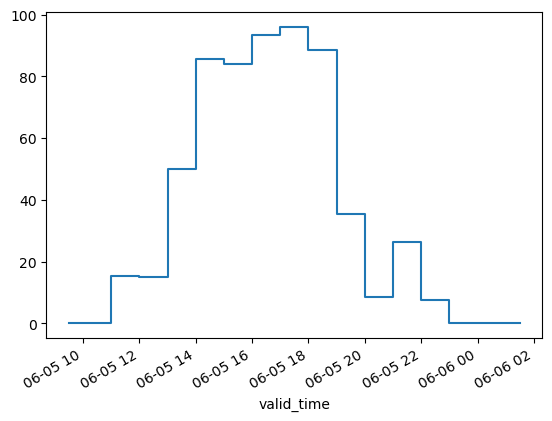

In [8]:
# plot the result
power_ac_forecast.plot(drawstyle='steps-mid')